In [1]:
import pandas as pd
import numpy as ny
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

**shopping_trends_updated.csv Dataset Reviews**

1. **Customer ID** – Unique identifier for the customer

2. **Age** – The age of the customer

3. **Gender** – The gender of the customer

4. **Item Purchased** – The product/item purchased

5. **Category** – The category of the product

6. **Purchase Amount (USD)** – The amount spent in USD

7. **Location** – The location of the customer

8. **Size** – The size of the product (e.g., S, M, L)

9. **Color** – The color of the product

10. **Season** – The season in which the purchase was made (e.g., summer, winter)

11. **Review Rating** – The rating or review score given by the customer

12. **Subscription Status** – Indicates whether the customer has a subscription or not

13. **Shipping Type** – The type of shipping (e.g., standard, express)

14. **Discount Applied** – Whether a discount was applied or not

15. **Promo Code Used** – Whether a promotional code was used or not

16. **Previous Purchases** – Number of previous purchases by the customer

17. **Payment Method** – The method of payment (e.g., credit card, PayPal)

18. **Frequency of Purchases** – How often the customer makes purchases

The output below displays the first few rows of the shopping_trends_updated.csv dataset. Each row represents an individual customer purchase transaction. The dataset provides insights into customer demographics (such as age and gender), purchasing behavior (including product category and amount spent), and transaction details (payment method, shipping type, and discount usage). This information will be useful for identifying patterns and trends in shopping behavior.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.isnull()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


# Customer purchase 

Customer purchase frequency ranges from a single purchase to a maximum of 50, with a customer average of 25 purchases. This indicates a consistent pattern of repeat business.

# Product review ratings

Product review ratings span from 2.5 to 5.0 stars, with a strong average of 3.74. The majority of customer feedback is positive, with 50% of all ratings concentrated between 3.1 and 4.4, indicating a generally consistent and favorable customer experience.

# Customer transaction values
Customer transaction values range from 20$ to 100$ with an average purchase amount of 59.76$. The close alignment of the average with the median value of $60 indicates a well-balanced and consistent spending pattern across the customer base, free from significant outliers.

# The customer base 

The customer base spans a wide age range from 18 to 70, with an average age of approximately 44. The data indicates a well-balanced age distribution, with the central 50% of customers aged between 31 and 57.

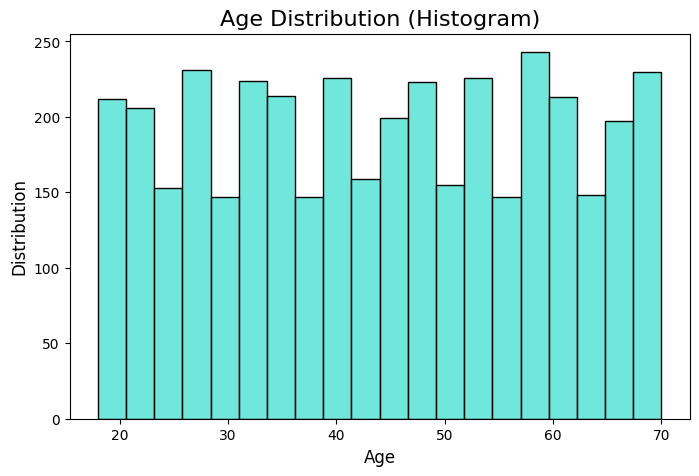

In [7]:
# Objective: To see the age distribution of customers and clarify the target audience.
  
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, color='#40E0D0', kde=False)  # Turquoise blue
plt.title("Age Distribution (Histogram)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.show()

# Analysis of Age Distribution

The histogram illustrates a relatively uniform distribution of customer ages, spanning from approximately 18 to 70 years old. There are no significant peaks or clusters, indicating that the customer base is not concentrated within a single age demographic.

This suggests that the products or services represented in the dataset appeal to a broad range of consumers. The purchasing behavior is not confined to a specific generation or age group, but rather is consistent across various life stages. This broad appeal is a key characteristic of the customer base.

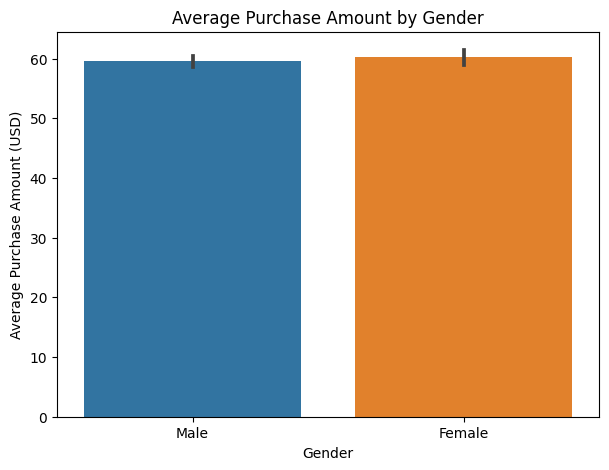

In [8]:
# Get the average purchase amount by gender.

plt.figure(figsize=(7,5))
sns.barplot(x="Gender", y="Purchase Amount (USD)", data=df, estimator="mean")
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()

# Analysis of Spending Behavior by Gender

The analysis reveals that average purchase amounts are nearly identical for both male and female customers, with both genders spending approximately $60 per transaction. This indicates that gender does not appear to be a significant factor influencing spending behavior within this dataset.

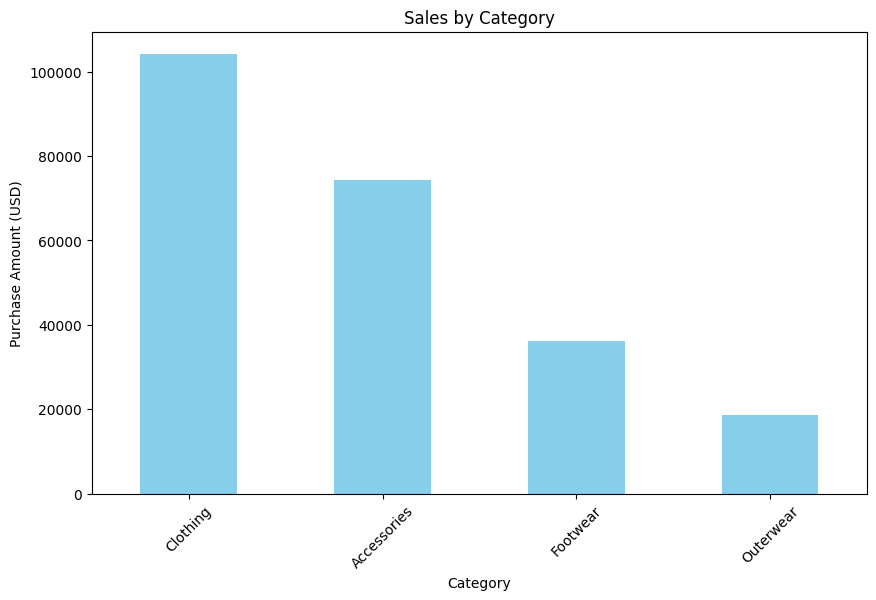

In [9]:
#Get the average sales by category.

category_sales = df.groupby("Category")["Purchase Amount (USD)"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
category_sales.plot(kind="bar", color="skyblue")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Purchase Amount (USD)")
plt.xticks(rotation=45)
plt.show()

# Revenue Concentration in Core Product Categories

A detailed analysis of revenue distribution reveals a significant concentration in the "Clothing" and "Accessories" categories. These two segments account for the majority of the company's sales, indicating that they are the primary drivers of financial performance. This uneven distribution underscores the strategic importance of prioritizing these key categories in all future marketing efforts, resource allocation, and inventory management to maximize profitability and market share.

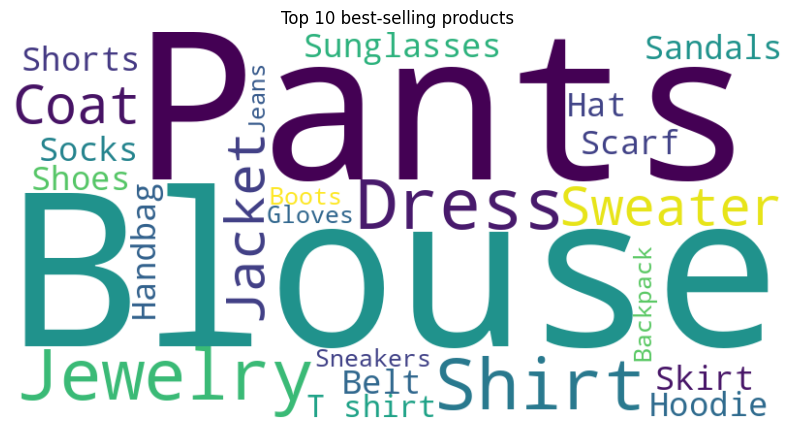

In [10]:
# Get the 10 best-selling products.

text = " ".join(df["Item Purchased"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 10 best-selling products")
plt.show()

#  Interpreting the Product Purchase Word Cloud

This visualization, known as a word cloud, graphically represents the purchase frequency of different products. The size of each word is directly proportional to its sales volume within the dataset. Therefore, the most prominently displayed words correspond to the products that have been purchased most often, offering an immediate visual guide to top-selling items.

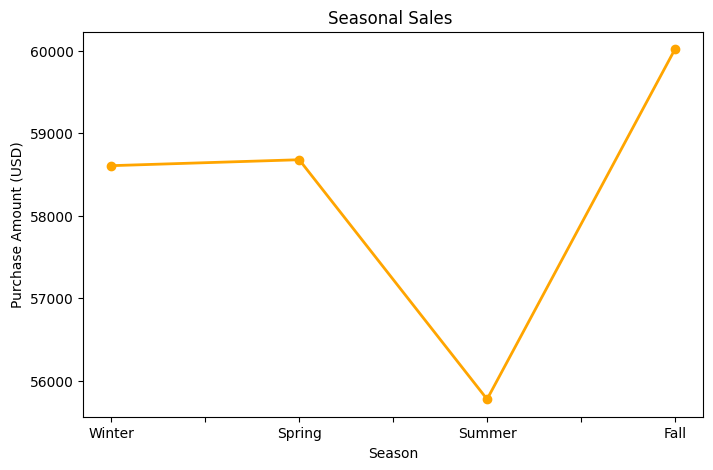

In [11]:
# Get the total sales amount by season

season_sales = df.groupby("Season")["Purchase Amount (USD)"].sum().reindex(["Winter","Spring","Summer","Fall"])

plt.figure(figsize=(8,5))
season_sales.plot(kind="line", marker="o", linewidth=2, color="orange")
plt.title("Seasonal Sales ")
plt.xlabel("Season")
plt.ylabel("Purchase Amount (USD)")
plt.show()

# Analysis of Seasonal Sales Patterns and Strategic Implications

The analysis of the dataset reveals a distinct seasonal pattern in sales performance. Sales volume peaks during the Fall season, followed by a progressive decline through Spring, reaching its lowest point in Summer. A significant recovery in sales begins with the onset of the Winter season.


This cyclical trend suggests clear opportunities for data-driven strategic planning. For instance, to capitalize on the natural upswing, marketing efforts and inventory could be scaled up during the high-performing Fall and Winter months. Conversely, to mitigate the off-peak downturn, the data supports the hypothesis that targeted promotional campaigns during the Summer could be an effective strategy to stimulate demand.

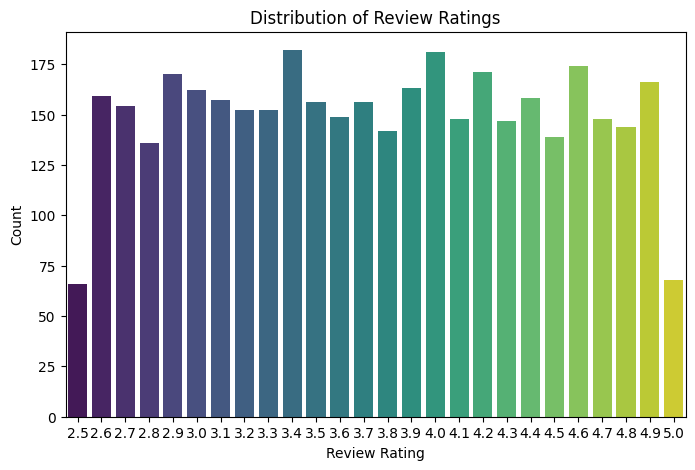

In [12]:
# # Customer satisfaction distribution with Count Plot

plt.figure(figsize=(8,5))
sns.countplot(x="Review Rating", data=df, palette="viridis")
plt.title("Distribution of Review Ratings")
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.show()

# Interpreting the Customer Rating Distribution

An analysis of the customer rating distribution reveals a central tendency towards moderate-to-high scores. The lower frequency of ratings at the extreme ends of the scale—both at 5.0 (excellent) and 2.5 (poor)—indicates that the majority of customers have a satisfactory, but not exceptional, experience. From a data modeling perspective, this distribution suggests that the product line is consistent. For business application, it highlights a clear opportunity to focus on enhancements that could shift the curve towards the higher end and generate more 5-star reviews.

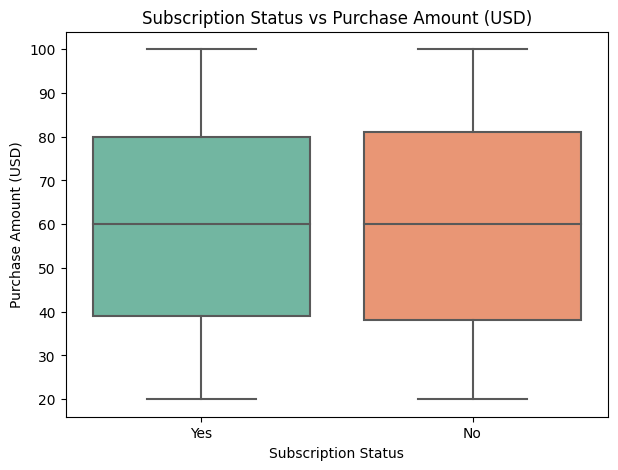

In [13]:
# Calculating the purchase amount based on subscription status

plt.figure(figsize=(7,5))
sns.boxplot(x="Subscription Status", y="Purchase Amount (USD)", data=df, palette="Set2")
plt.title("Subscription Status vs Purchase Amount (USD)")
plt.xlabel("Subscription Status")
plt.ylabel("Purchase Amount (USD)")
plt.show()

# Subscription Status: No Discernible Impact on Customer Spending

A comparative analysis of spending distributions was conducted between customers with a subscription and those without. The resulting boxplots for both segments are strikingly similar, indicating nearly identical medians, interquartile ranges (IQRs), and overall data spread. This strong overlap suggests that subscription status is not a significant predictor of purchase value within this dataset. Both cohorts exhibit a homogenous spending pattern, implying that the primary value of the subscription model may relate to customer retention or recurring revenue rather than influencing higher transactional spending.

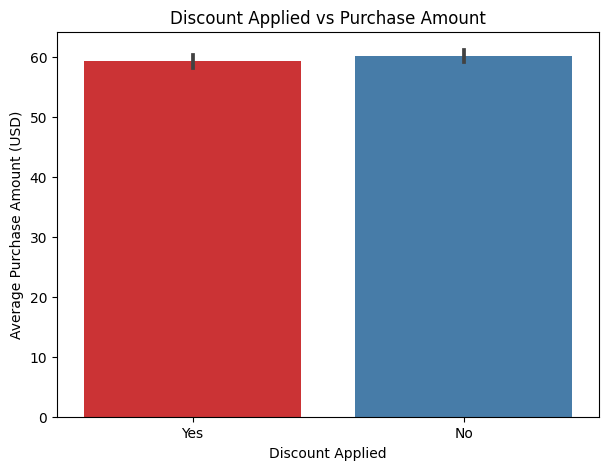

In [14]:
# Average purchase amount based on discount application status

plt.figure(figsize=(7,5))
sns.barplot(x="Discount Applied", y="Purchase Amount (USD)", data=df, estimator="mean", palette="Set1")
plt.title("Discount Applied vs Purchase Amount")
plt.xlabel("Discount Applied")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()

# Discount Code Usage: No Significant Impact on Average Transaction Value

A comparative analysis of average purchase values reveals no statistically significant difference between transactions completed with a discount code and those without. The data indicates that both customer cohorts—those who apply discounts and those who do not—exhibit nearly identical spending behavior. This suggests that, within this dataset, the primary function of discount codes may be to drive conversion or customer acquisition rather than to incentivize an increase in the total purchase amount (Average Order Value).

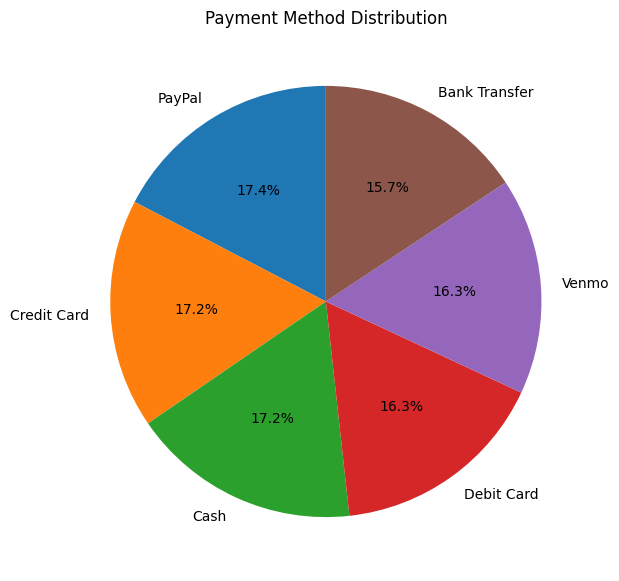

In [15]:
# Payment Method Distribution

payment_counts = df["Payment Method"].value_counts()
plt.figure(figsize=(7,7))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Payment Method Distribution")
plt.show()

# Analysis of Payment Method Preferences: A Balanced Distribution

The analysis of payment method adoption reveals a remarkably balanced distribution among customers, with no single method showing dominant preference. While PayPal is technically the most utilized at 17.4%, it is followed closely by Credit Card and Cash. The least common option, Bank Transfer, still captures a significant 15.7% of transactions. The minimal variance between the most and least used methods suggests that the customer base has broad and nearly equal acceptance of all available payment options. This implies that maintaining a diverse range of payment methods is crucial to cater effectively to the entire user population.

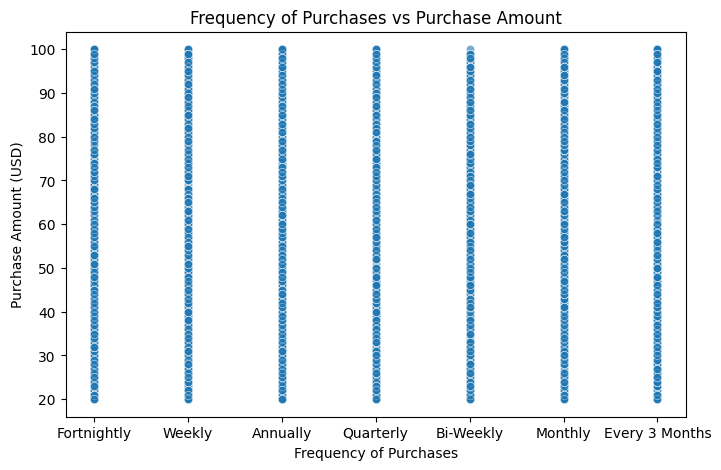

In [16]:
# Frequency of Purchases vs Purchase Amount

plt.figure(figsize=(8,5))
sns.scatterplot(x="Frequency of Purchases", y="Purchase Amount (USD)", data=df, alpha=0.6)
plt.title("Frequency of Purchases vs Purchase Amount")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.show()

# Inverse Relationship Between Purchase Frequency and Transaction Value

The analysis reveals a clear inverse correlation between customer shopping frequency and their average transaction value (ATV). Specifically, customers who shop on a Bi-Weekly basis exhibit the highest average spend per visit. Conversely, the most frequent visitors, the Weekly shoppers, record the lowest average spend. This pattern suggests that less frequent shoppers tend to make larger, "stock-up" purchases, while more frequent shoppers engage in smaller, more targeted "top-up" transactions.